In [5]:
import pandas as pd



#Buscamos ver como altera una desviacion del Total Amount de la mediana del mismo a la probabilidad de exito.
#La mediana sera calculada teniendo en cuenta la familia a la que el producto pertenece.

#Cargamos un csv ya limpio

gp = pd.read_csv("../Entrenamieto_ECI_2020_Total_Amount.csv")
gp = gp.loc[:, ['Product_Family', 'Total_Amount(USD)', 'Stage']]
#Vemos que no hay filas nulas
gp.isnull().sum()

Product_Family       0
Total_Amount(USD)    0
Stage                0
dtype: int64

In [6]:
gp['Product_Family_Median'] = gp.groupby('Product_Family')['Total_Amount(USD)'].transform('median')
gp['Deviation_Rate_From_Median'] = 100 * (gp['Total_Amount(USD)'] - gp.Product_Family_Median) / gp.Product_Family_Median
gp['Stage'] = (gp['Stage'] == 'Closed Won').astype(int)
gp = gp.rename(columns={'Stage' : 'Closed_Won'})
gp

,Product_Family,Total_Amount(USD),Closed_Won,Product_Family_Median,Deviation_Rate_From_Median
0,Product_Family_77,5.964044e+06,0,78489.45,7498.529229
1,Product_Family_77,5.455268e+04,1,78489.45,-30.496799
2,Product_Family_81,8.386560e+04,1,72134.40,16.262976
3,Product_Family_209,7.421882e+06,0,1437956.55,416.140874
4,Product_Family_209,1.335719e+07,0,1437956.55,828.900981
...,...,...,...,...,...
16582,Product_Family_85,1.168988e+05,1,95400.00,22.535417
16583,Product_Family_85,1.052089e+05,1,95400.00,10.281875
16584,Product_Family_85,1.168988e+05,1,95400.00,22.535417
16585,Product_Family_158,2.346797e+06,0,659835.00,255.664201


In [7]:
def discretizar(val, delta):
    low = (val // delta) * delta
    high = low + delta
    return high if (abs(val - high) < abs(val - low)) else low

gp['Discretized_Deviation'] = gp['Deviation_Rate_From_Median'].apply(lambda x: discretizar(x, 2.5))

closed_won_rate_by_deviation = gp.groupby('Discretized_Deviation')\
                                 .agg({'Closed_Won' : ['mean', 'count']})\
                                 .reset_index()
closed_won_rate_by_deviation.columns = ['Discretized_Deviation', 'Closed_Won_Mean', 'Closed_Won_count']
closed_won_rate_by_deviation = closed_won_rate_by_deviation.loc[closed_won_rate_by_deviation.Closed_Won_count > 20]

closed_won_rate_by_deviation.head(3)

,Discretized_Deviation,Closed_Won_Mean,Closed_Won_count
0,-100.0,0.809524,210
1,-97.5,0.731183,465
2,-95.0,0.715990,419


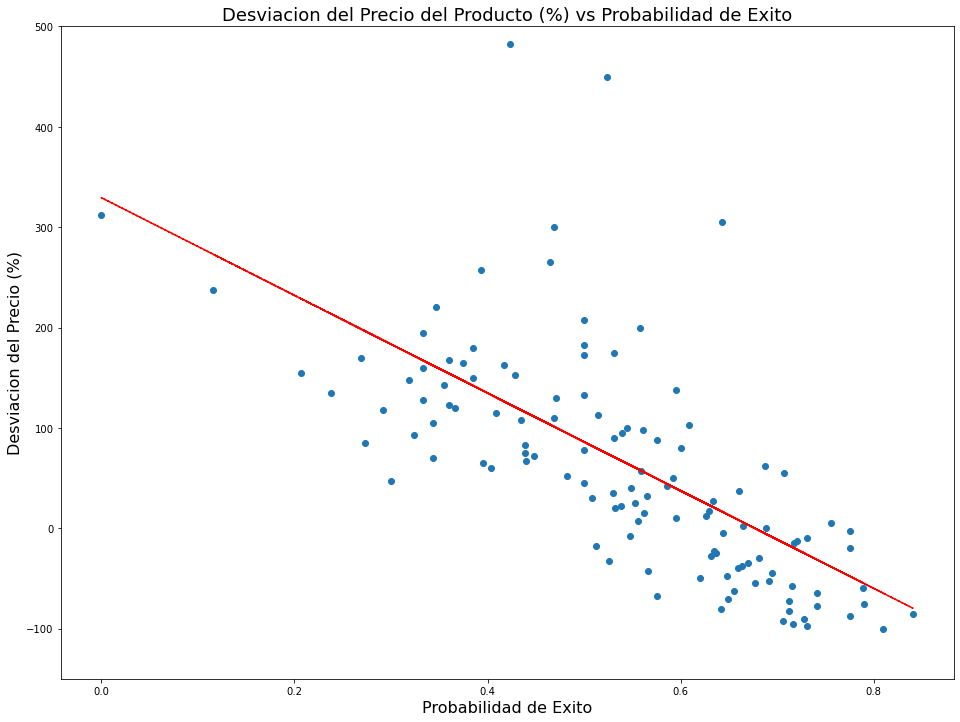

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

x = closed_won_rate_by_deviation.Closed_Won_Mean.tolist()
y = closed_won_rate_by_deviation.Discretized_Deviation.tolist()

plt.figure(figsize=(16, 12))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Desviacion del Precio del Producto (%) vs Probabilidad de Exito", fontdict={'size' : 18})
plt.xlabel("Probabilidad de Exito", fontdict={'size' : 16})
plt.ylabel("Desviacion del Precio (%)", fontdict={'size' : 16})

plt.ylim(-150, 500)

plt.show()

In [9]:
#Observamos que hay una clara correlacion entre la desviacion del precio del producto y la probabilidad de exito
#Los productos que tienen un precio de venta mayor al de la mediana de la familia del producto tendran menor probabilidad de exito
#En cambio, los que tienen un precio de venta menor tendran una probabilidad de exito mayor